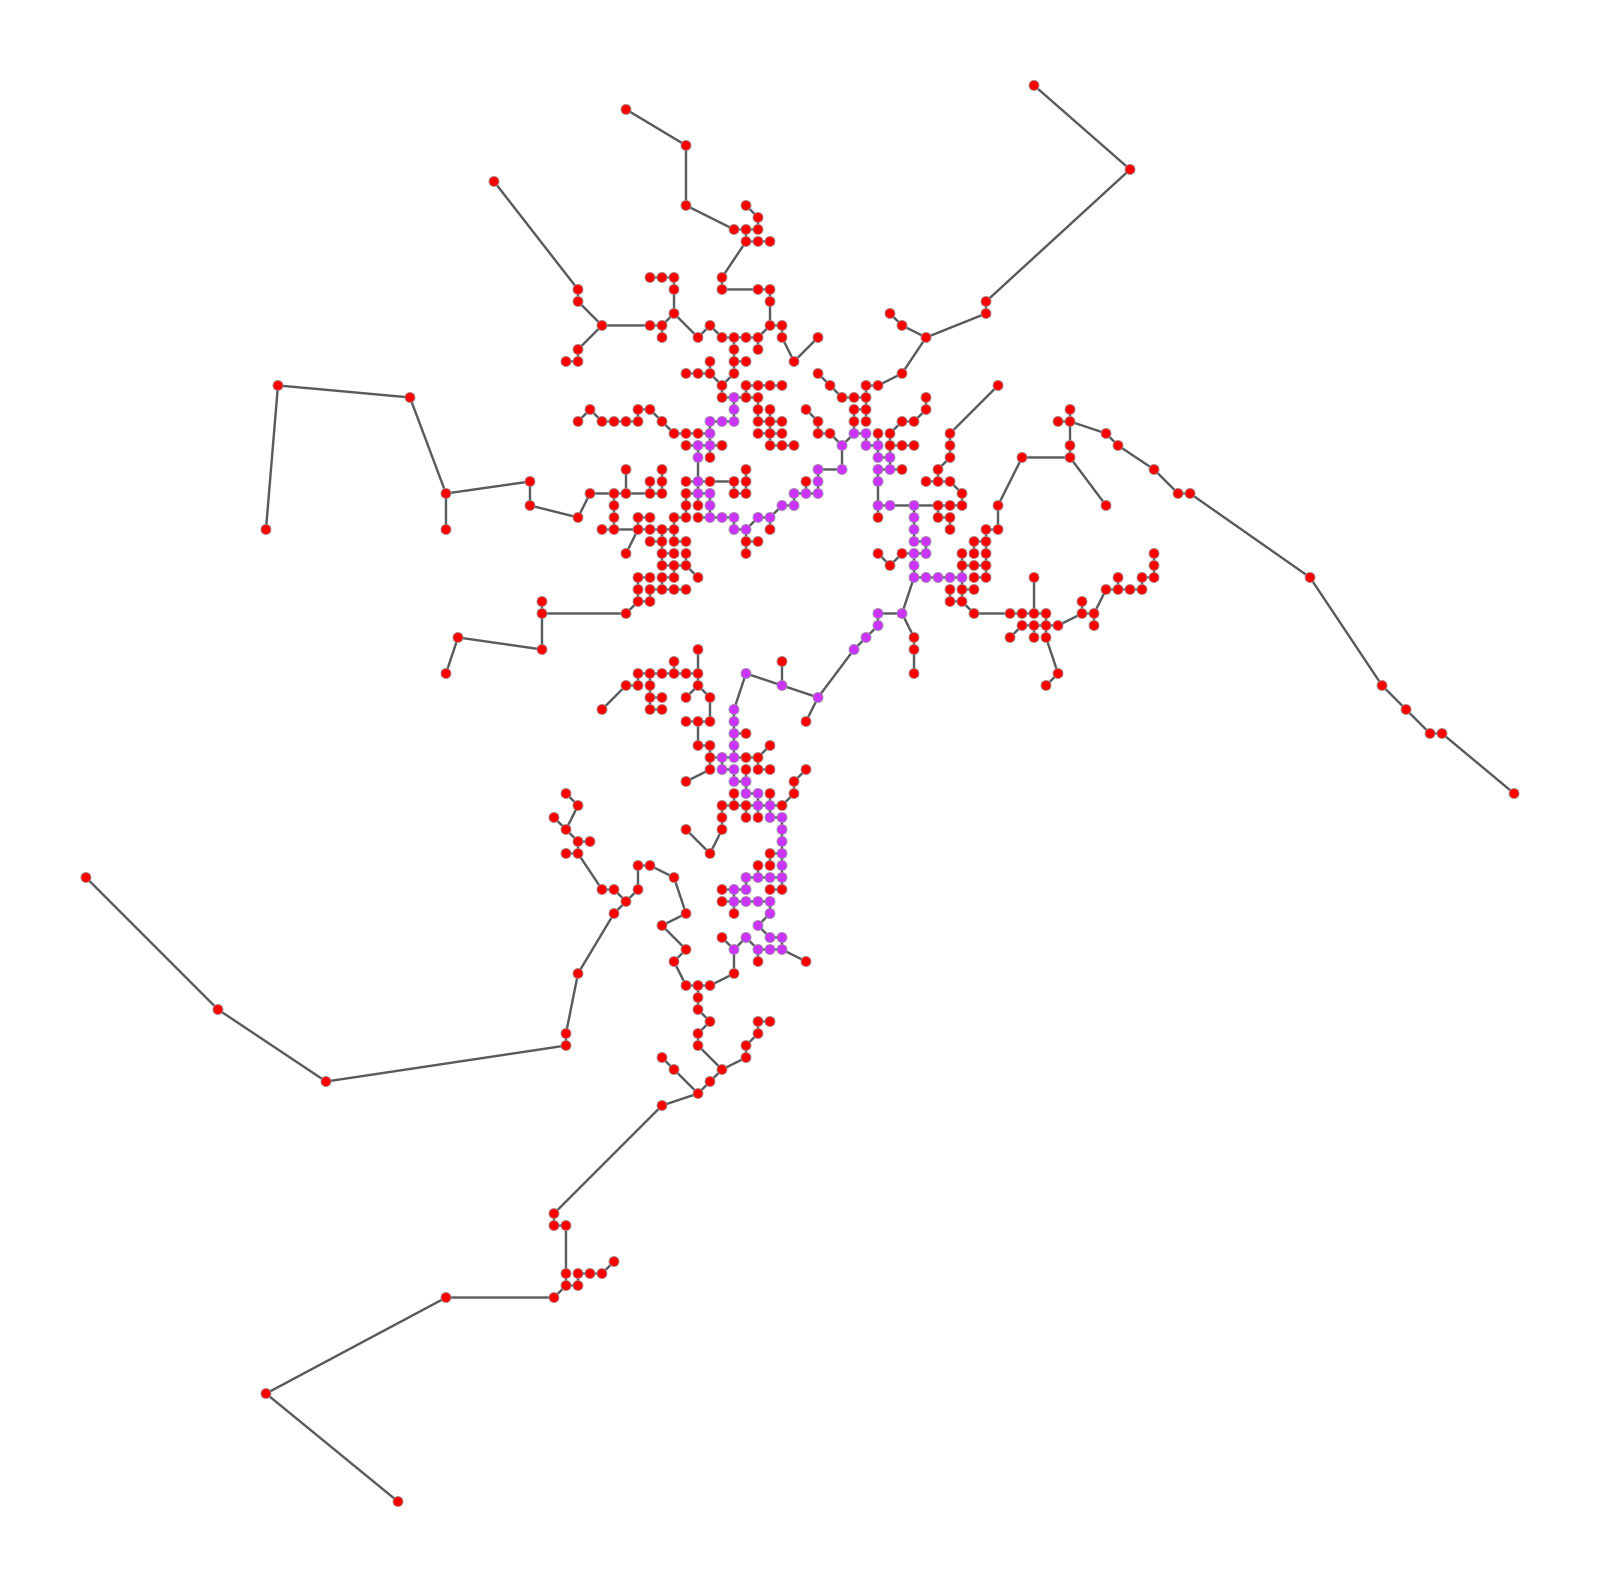

In [35]:
import numpy as np
import graph_tool.all as gt
import python_codes.files_operators as fo
import matplotlib.pyplot as plt

# 读取图数据
read_graph, read_pos = fo.read_files("./networks_date/tokyo_pop_500_mst.net")

# 创建位置属性，并转换为浮点型
pos = read_graph.new_vertex_property("vector<double>")
for v in read_graph.vertices():
    pos[v] = [float(coord) for coord in read_pos[v]]

# 计算介数中心性
betweenness, _ = gt.betweenness(read_graph)

# 选取前 10% 介数中心性最高的节点
sorted_nodes = np.argsort(-betweenness.a)  # 从高到低排序
num_important_nodes = max(5, int(len(sorted_nodes) * 0.2))  # 至少选 5 个点
key_nodes = sorted_nodes[:num_important_nodes]

# 设置颜色属性
vertex_colors = read_graph.new_vertex_property("vector<double>")
for v in read_graph.vertices():
    if int(v) in key_nodes:
        vertex_colors[v] = (0.8, 0.2, 1, 1)  # 关键节点标记为亮紫色
    else:
        vertex_colors[v] = (1, 0, 0, 1)  # 其他节点为红色

# 绘制网络图
gt.graph_draw(read_graph, pos=pos,
              vertex_size=5,
              vertex_fill_color=vertex_colors,
              edge_pen_width=1.2,
              output_size=(800, 800))

plt.show()
